<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#로지스틱-회귀분석-과제" data-toc-modified-id="로지스틱-회귀분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>로지스틱 회귀분석 과제</a></span></li></ul></div>

# 로지스틱 회귀분석 과제 

- 1) 타이타닉 데이터를 불러오고 survived를 종속변수(y)로, 나머지 변수들은 독립변수(X)로 설정하세요 


In [13]:
import pandas as pd 
df_t = pd.read_csv("C:/adp/data/titanic.csv")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
df_t = df_t.drop(columns=['who', 'deck', 'alive', 'alone', 'class', 'embark_town'])
X = df_t.drop('survived', axis = 1)
y = df_t.survived

In [15]:
print(X.shape, y.shape)

(891, 8) (891,)


In [16]:
age_idx = X[X.age.isnull() == True].index
embard_idx = X[X.embarked.isnull() == True].index

In [17]:
X = X.drop(age_idx)
X = X.drop(embard_idx)
y = y.drop(age_idx)
y = y.drop(embard_idx)

In [18]:
X[X.index.isin(y.index)]

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,3,male,22.0,1,0,7.2500,S,True
1,1,female,38.0,1,0,71.2833,C,False
2,3,female,26.0,0,0,7.9250,S,False
3,1,female,35.0,1,0,53.1000,S,False
4,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,False
886,2,male,27.0,0,0,13.0000,S,True
887,1,female,19.0,0,0,30.0000,S,False
889,1,male,26.0,0,0,30.0000,C,True


- 2) X의 결측치가 존재하는 행을 삭제하고, 범주형 변수를 더미변수화 시키세요 

In [19]:
X = pd.get_dummies(X, columns=['pclass', 'sex', 'embarked'])
X

,age,sibsp,parch,fare,adult_male,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,22.0,1,0,7.2500,True,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,False,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,False,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,False,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,True,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,False,0,0,1,1,0,0,1,0
886,27.0,0,0,13.0000,True,0,1,0,0,1,0,0,1
887,19.0,0,0,30.0000,False,1,0,0,1,0,0,0,1
889,26.0,0,0,30.0000,True,1,0,0,0,1,1,0,0


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         712 non-null    float64
 1   sibsp       712 non-null    int64  
 2   parch       712 non-null    int64  
 3   fare        712 non-null    float64
 4   adult_male  712 non-null    bool   
 5   pclass_1    712 non-null    uint8  
 6   pclass_2    712 non-null    uint8  
 7   pclass_3    712 non-null    uint8  
 8   sex_female  712 non-null    uint8  
 9   sex_male    712 non-null    uint8  
 10  embarked_C  712 non-null    uint8  
 11  embarked_Q  712 non-null    uint8  
 12  embarked_S  712 non-null    uint8  
dtypes: bool(1), float64(2), int64(2), uint8(8)
memory usage: 34.1 KB


In [25]:
X = X.astype(float)

- 3) 독립변수(X)를 StandardScaler를 통해 변환하세요 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

- 4) X와 y를 홀드아웃 기법을 사용하여 7:3으로 분할하세요 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=42)

- 5) X_train과 y_train을 가지고 로지스틱 회귀분석모델을 만드세요

In [28]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.409669
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                           10
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3926
Time:                        22:57:30   Log-Likelihood:                -204.02
converged:                       True   LL-Null:                       -335.88
Covariance Type:            nonrobust   LLR p-value:                 7.031e-51
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0243      0.011     -2.290      0.022      -0.045      -0.003
sibsp         -0.4152      0.170     -2.448      0.014      -0.748      -0.083
parch         -0.4100      0.193     -2.120      0.034      -0.789      -0.031
fare           0.0027      0.005      0.559      0.576      -0.007       0.012
adult_male    -3.3422      0.672     -4.976      0.000      -4.659      -2.026
pclass_1       1.9524        nan        nan        nan         nan         nan
pclass_2       0.7781        nan        nan        nan         nan         nan
pclass_3      -0.5734        nan        nan        nan         nan         nan
sex_female     1.0321   3.96e+07    2.6e-08      1.000   -7.77e+07    7.77e+07
sex_male       1.1250   3.96e+07   2.84e-08      1.000   -7.77e+07    7.77e+07
embarked_C     1.3311    3.4e+07   3.91e-08      1.000   -6.67e+07    6.67e+07
embarked_Q    -0.0313    3.4e+07   -9.2e-10      1.000   -6.67e+07    6.67e+07
embarked_S     0.8573    3.4e+07   2.52e-08      1.000   -6.67e+07    6.67e+07
==============================================================================
"""

In [29]:
result.aic

430.0301926648076

- 6) 변수선택법을 통해 최적의 회귀 방정식을 구하고, 유의한 변수만을 추출하세요. (변수선택법은 복사 붙여넣기) 

In [30]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y,predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors]
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [31]:
Stepwise_best_model = Stepwise_model(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.672292
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672249
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670544
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.619472
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604285
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667044
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.609125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.545323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.545618
  

In [32]:
Stepwise_best_model.aic

426.0361139629231

In [33]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3896
Time:                        22:58:28   Log-Likelihood:                -205.02
converged:                       True   LL-Null:                       -335.88
Covariance Type:            nonrobust   LLR p-value:                 8.868e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
adult_male    -3.2076      0.310    -10.355      0.000      -3.815      -2.600
pclass_1       3.9509      0.574      6.879      0.000       2.825       5.077
pclass_2       2.6725      0.439      6.093      0.000       1.813       3.532
sibsp         -0.4036      0.151     -2.672      0.008      -0.700      -0.108
pclass_3       1.2382      0.379      3.268      0.001       0.496       1.981
age           -0.0247      0.010     -2.431      0.015      -0.045      -0.005
parch         -0.3427      0.178     -1.930      0.054      -0.691       0.005
embarked_C     0.5143      0.346      1.487      0.137      -0.164       1.192
==============================================================================
"""

In [34]:
X_test

,age,sibsp,parch,fare,adult_male,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
624,21.0,0.0,0.0,16.1000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
702,18.0,0.0,1.0,14.4542,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
71,16.0,5.0,2.0,46.9000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
399,28.0,0.0,0.0,12.6500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
634,9.0,3.0,2.0,27.9000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
689,15.0,0.0,1.0,211.3375,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
135,23.0,0.0,0.0,15.0458,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
827,1.0,0.0,2.0,37.0042,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
print("최적 변수 : ", list(Stepwise_best_model.params.index))

최적 변수 :  ['adult_male', 'pclass_1', 'pclass_2', 'sibsp', 'pclass_3', 'age', 'parch', 'embarked_C']


In [37]:
X_test = X_test.loc[:,Stepwise_best_model.params.index]
X_test

,adult_male,pclass_1,pclass_2,sibsp,pclass_3,age,parch,embarked_C
624,1.0,0.0,0.0,0.0,1.0,21.0,0.0,0.0
702,0.0,0.0,0.0,0.0,1.0,18.0,1.0,1.0
71,0.0,0.0,0.0,5.0,1.0,16.0,2.0,0.0
399,0.0,0.0,1.0,0.0,0.0,28.0,0.0,0.0
634,0.0,0.0,0.0,3.0,1.0,9.0,2.0,0.0
...,...,...,...,...,...,...,...,...
4,1.0,0.0,0.0,0.0,1.0,35.0,0.0,0.0
689,0.0,1.0,0.0,0.0,0.0,15.0,1.0,0.0
135,1.0,0.0,1.0,0.0,0.0,23.0,0.0,1.0
827,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0


In [39]:
pred = Stepwise_best_model.predict(X_test)
pred

624    0.076745
702    0.724273
71     0.134681
399    0.878876
634    0.293131
         ...   
4      0.055580
689    0.962246
135    0.357055
827    0.922487
267    0.047892
Length: 214, dtype: float64

In [40]:
y_test

624    0
702    0
71     0
399    1
634    0
      ..
4      0
689    1
135    0
827    1
267    1
Name: survived, Length: 214, dtype: int64

- 6) X_test값을 가지고 y_predict값을 구한 후 혼동행렬을 만드세요 

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# 임계값을 설정해서 예측값을 이진분류로 반환하기
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold] = 0
    return(Y.astype(int))
y_pred = cut_off(pred, 0.5)  #임계값을 0.5로 설정
y_pred

624    0
702    1
71     0
399    1
634    0
      ..
4      0
689    1
135    0
827    1
267    0
Length: 214, dtype: int32

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[107,  20],
       [ 22,  65]], dtype=int64)

In [43]:
print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("precision_score : ", precision_score(y_test, y_pred))
print("f1_score : ", f1_score(y_test, y_pred))

Acuuracy :  0.8037383177570093
Sensitivity(recall) :  0.7471264367816092
precision_score :  0.7647058823529411
f1_score :  0.755813953488372


In [44]:
# 확률로 예측하기
y_pred_proba = Stepwise_best_model.predict(X_test)
y_pred_proba

624    0.076745
702    0.724273
71     0.134681
399    0.878876
634    0.293131
         ...   
4      0.055580
689    0.962246
135    0.357055
827    0.922487
267    0.047892
Length: 214, dtype: float64

- 7) X_test값을 가지고 y_predict_proba 값을 구한 후 roc_auc_score를 구하고 해석하세요 

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# ROC 커브 시각화

def draw_roc(test_y, pred_y, model_name):
    fpr, tpr, thr = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(model_name))
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()

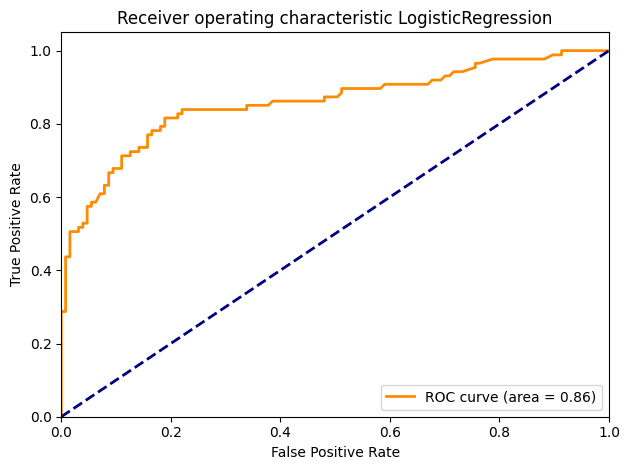

In [46]:
draw_roc(y_test, y_pred_proba, "LogisticRegression")

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba) # roc_auc 값에는 확률값이 들어가야 함. cutoff를 통해 변환한 값이 들어가면 안됨.

0.8579961987510182

- 7) 회귀계수를 구하고, 유의한 회귀계수의 값을 설명하세요 

In [49]:
import numpy as np
np.exp(Stepwise_best_model.params)

adult_male     0.040453
pclass_1      51.981347
pclass_2      14.475658
sibsp          0.667878
pclass_3       3.449332
age            0.975636
parch          0.709828
embarked_C     1.672454
dtype: float64